In [ ]:
import numpy as np
import pandas as pd
from pathlib import Path
import os.path
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img,img_to_array

In [ ]:
for dirname, _, filenames in os.walk('/content/drive/MyDrive/raw ingredients'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/content/drive/MyDrive/raw ingredients/test/spinach/Image_2.jpg
/content/drive/MyDrive/raw ingredients/test/spinach/Image_6.jpg
/content/drive/MyDrive/raw ingredients/test/spinach/Image_5.jpg
/content/drive/MyDrive/raw ingredients/test/spinach/Image_1.jpg
/content/drive/MyDrive/raw ingredients/test/spinach/Image_8.jpg
/content/drive/MyDrive/raw ingredients/test/spinach/Image_9.jpg
/content/drive/MyDrive/raw ingredients/test/spinach/Image_4.jpg
/content/drive/MyDrive/raw ingredients/test/spinach/Image_7.jpg
/content/drive/MyDrive/raw ingredients/test/spinach/Image_10.jpg
/content/drive/MyDrive/raw ingredients/test/spinach/Image_3.jpg
/content/drive/MyDrive/raw ingredients/test/pomegranate/Image_2.jpg
/content/drive/MyDrive/raw ingredients/test/pomegranate/Image_10.jpg
/content/drive/MyDrive/raw ingredients/test/pomegranate/Image_4.jpg
/content/drive/MyDrive/raw ingredients/test/pomegranate/Image_8.jpg
/content/drive/MyDrive/raw ingredients/test/pomegranate/Image_3.jpg
/content/drive/MyD

In [ ]:
train_dir = Path('/content/drive/MyDrive/raw ingredients/train')
train_filepaths = list(train_dir.glob(r'**/*.jpg'))

In [ ]:
test_dir = Path('/content/drive/MyDrive/raw ingredients/test')
test_filepaths = list(test_dir.glob(r'**/*.jpg'))

In [ ]:
val_dir = Path('/content/drive/MyDrive/raw ingredients/validation')
val_filepaths = list(test_dir.glob(r'**/*.jpg'))

In [ ]:
def image_processing(filepath):
    #Create a DataFrame with the filepath and the labels of the pictures

    labels = [str(filepath[i]).split("/")[-2] for i in range(len(filepath))]

    filepath = pd.Series(filepath, name='Filepath').astype(str)
    labels = pd.Series(labels, name='Label')

    # Concatenate filepaths and labels
    df = pd.concat([filepath, labels], axis=1)

    # Shuffle the DataFrame and reset index
    df = df.sample(frac=1).reset_index(drop = True)

    return df

In [ ]:
train_df = image_processing(train_filepaths)
test_df = image_processing(test_filepaths)
val_df = image_processing(val_filepaths)

In [ ]:
print('-- Training set --\n')
print(f'Number of pictures: {train_df.shape[0]}\n')
print(f'Number of different labels: {len(train_df.Label.unique())}\n')
print(f'Labels: {train_df.Label.unique()}')

-- Training set --

Number of pictures: 2780

Number of different labels: 36

Labels: ['kiwi' 'eggplant' 'onion' 'garlic' 'pear' 'orange' 'banana' 'tomato'
 'pineapple' 'potato' 'raddish' 'spinach' 'carrot' 'sweetcorn'
 'pomegranate' 'bell pepper' 'peas' 'paprika' 'ginger' 'cabbage'
 'beetroot' 'cauliflower' 'watermelon' 'lemon' 'cucumber' 'chilli pepper'
 'soy beans' 'lettuce' 'grapes' 'mango' 'jalepeno' 'corn' 'sweetpotato'
 'capsicum' 'turnip' 'apple']


In [ ]:
train_df.head(5)

,Filepath,Label
0,/content/drive/MyDrive/raw ingredients/train/k...,kiwi
1,/content/drive/MyDrive/raw ingredients/train/e...,eggplant
2,/content/drive/MyDrive/raw ingredients/train/o...,onion
3,/content/drive/MyDrive/raw ingredients/train/g...,garlic
4,/content/drive/MyDrive/raw ingredients/train/p...,pear


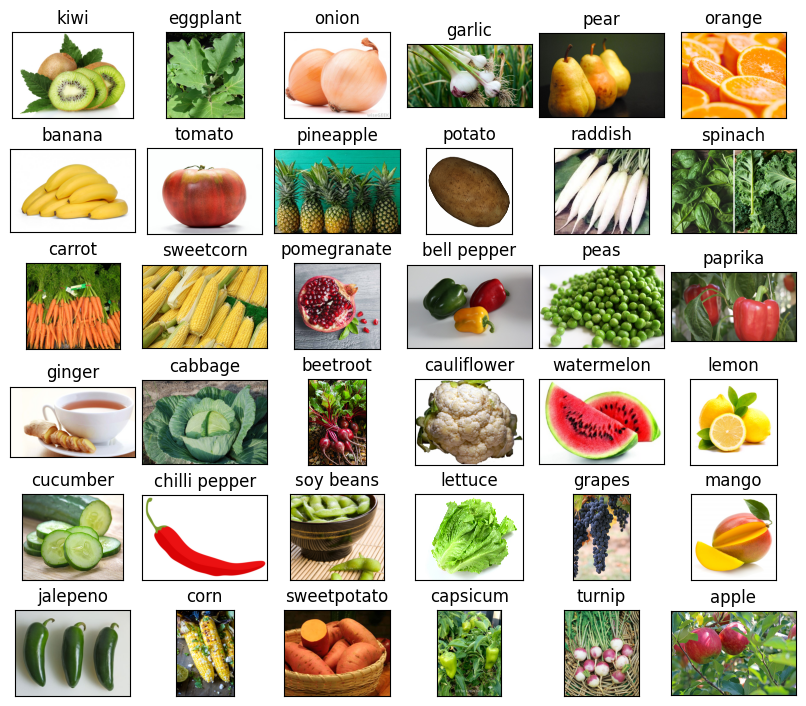

In [ ]:
df_unique = train_df.copy().drop_duplicates(subset=["Label"]).reset_index()

# Display some pictures of the dataset
fig, axes = plt.subplots(nrows=6, ncols=6, figsize=(8, 7),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(df_unique.Filepath[i]))
    ax.set_title(df_unique.Label[i], fontsize = 12)
plt.tight_layout(pad=0.5)
plt.show()

In [ ]:
train_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    preprocessing_function=tf.keras.applications.mobilenet_v2.preprocess_input)

test_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    preprocessing_function=tf.keras.applications.mobilenet_v2.preprocess_input)

In [ ]:
train_images = train_generator.flow_from_dataframe(
    dataframe=train_df,
    x_col='Filepath',
    y_col='Label',
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    seed=0,
    rotation_range=30,
    zoom_range=0.15,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.15,
    horizontal_flip=True,
    fill_mode="nearest"
)

Found 2780 validated image filenames belonging to 36 classes.


In [ ]:
val_images = train_generator.flow_from_dataframe(
    dataframe=val_df,
    x_col='Filepath',
    y_col='Label',
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    seed=0,
    rotation_range=30,
    zoom_range=0.15,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.15,
    horizontal_flip=True,
    fill_mode="nearest"
)

Found 334 validated image filenames belonging to 36 classes.


In [ ]:
test_images = test_generator.flow_from_dataframe(
    dataframe=test_df,
    x_col='Filepath',
    y_col='Label',
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=False
)

Found 334 validated image filenames belonging to 36 classes.


# Model

In [ ]:
pretrained_model = tf.keras.applications.MobileNetV2(
    input_shape=(224, 224, 3),
    include_top=False,
    weights='imagenet',
    pooling='avg'
)
pretrained_model.trainable = False

9406464/9406464 [==============================] - 0s 0us/step


In [ ]:
inputs = pretrained_model.input

x = tf.keras.layers.Dense(128, activation='relu')(pretrained_model.output)
x = tf.keras.layers.Dense(128, activation='relu')(x)

outputs = tf.keras.layers.Dense(36, activation='softmax')(x)

model = tf.keras.Model(inputs=inputs, outputs=outputs)

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

history = model.fit(
    train_images,
    validation_data=val_images,
    batch_size = 32,
    epochs=30,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(
            monitor='val_loss',
            patience=2,
            restore_best_weights=True
        )
    ]
)

Epoch 1/30
87/87 [==============================] - 92s 1s/step - loss: 1.7737 - accuracy: 0.5385 - val_loss: 0.4339 - val_accuracy: 0.9012
Epoch 2/30
87/87 [==============================] - 94s 1s/step - loss: 0.5671 - accuracy: 0.8273 - val_loss: 0.3252 - val_accuracy: 0.8982
Epoch 3/30
87/87 [==============================] - 85s 985ms/step - loss: 0.3385 - accuracy: 0.8885 - val_loss: 0.2261 - val_accuracy: 0.9192
Epoch 4/30
87/87 [==============================] - 86s 985ms/step - loss: 0.2157 - accuracy: 0.9277 - val_loss: 0.2075 - val_accuracy: 0.9401
Epoch 5/30
87/87 [==============================] - 86s 998ms/step - loss: 0.1485 - accuracy: 0.9561 - val_loss: 0.1759 - val_accuracy: 0.9521
Epoch 6/30
87/87 [==============================] - 95s 1s/step - loss: 0.1055 - accuracy: 0.9691 - val_loss: 0.1403 - val_accuracy: 0.9701
Epoch 7/30
87/87 [==============================] - 84s 960ms/step - loss: 0.0804 - accuracy: 0.9781 - val_loss: 0.1428 - val_accuracy: 0.9731
Epoch 8/

In [ ]:
pred = model.predict(test_images)
pred = np.argmax(pred,axis=1)
# Map the label
labels = (train_images.class_indices)
labels = dict((v,k) for k,v in labels.items())
pred1 = [labels[k] for k in pred]
pred1

11/11 [==============================] - 14s 1s/step


['raddish',
 'sweetcorn',
 'raddish',
 'pomegranate',
 'pineapple',
 'garlic',
 'lettuce',
 'cauliflower',
 'sweetpotato',
 'ginger',
 'paprika',
 'bell pepper',
 'tomato',
 'spinach',
 'cucumber',
 'soy beans',
 'turnip',
 'corn',
 'kiwi',
 'pear',
 'tomato',
 'eggplant',
 'sweetcorn',
 'corn',
 'sweetpotato',
 'tomato',
 'tomato',
 'bell pepper',
 'orange',
 'turnip',
 'orange',
 'jalepeno',
 'beetroot',
 'pomegranate',
 'turnip',
 'lettuce',
 'pear',
 'grapes',
 'ginger',
 'watermelon',
 'jalepeno',
 'bell pepper',
 'carrot',
 'orange',
 'potato',
 'peas',
 'turnip',
 'beetroot',
 'sweetpotato',
 'soy beans',
 'cauliflower',
 'banana',
 'cabbage',
 'lettuce',
 'carrot',
 'apple',
 'jalepeno',
 'eggplant',
 'cucumber',
 'beetroot',
 'capsicum',
 'spinach',
 'orange',
 'cabbage',
 'onion',
 'paprika',
 'jalepeno',
 'sweetpotato',
 'corn',
 'sweetpotato',
 'soy beans',
 'grapes',
 'paprika',
 'lettuce',
 'chilli pepper',
 'corn',
 'pineapple',
 'banana',
 'paprika',
 'eggplant',
 'wate

In [ ]:
def output(location):
    img=load_img(location,target_size=(224,224,3))
    img=img_to_array(img)
    img=img/255
    img=np.expand_dims(img,[0])
    answer=model.predict(img)
    y_class = answer.argmax(axis=-1)
    y = " ".join(str(x) for x in y_class)
    y = int(y)
    res = labels[y]
    return res

In [ ]:
img = output('/content/drive/MyDrive/raw ingredients/test/banana/Image_1.jpg')
img

1/1 [==============================] - 1s 1s/step


'banana'

In [ ]:
model.save('FV_1.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
